#Clasificación de frases según emojis.| k-Nearest Neighbors.


##1. Dataset con frases y emojis asociados (Extraer frases de redes sociales o generarlas).
##2. Representar las frases en forma de vectores utilizando TF-IDF o enbeddings como Word2Vec.
##3. Aplicar k-NN para clasificar las frases según el emoji más probable y entrenar el modelo.

##1. Dataset:

###Revisando Notas...

In [10]:
import numpy as np
from sklearn import svm
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
#from nltk.tokenize import KNeighborsClassifier # Remove or comment out this line
from gensim.models import Word2Vec
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize # import the word_tokenize function


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


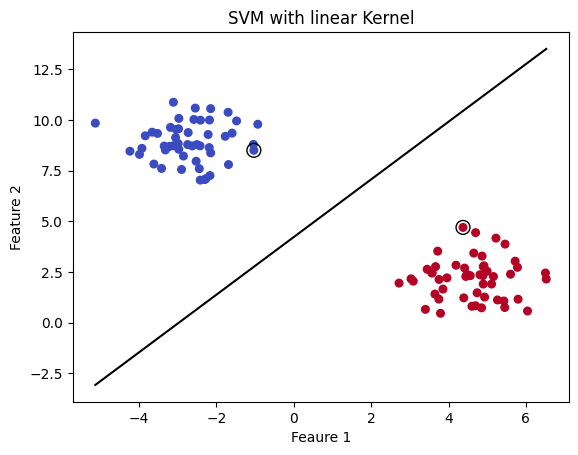

In [3]:
#Generar datos sintéticos.
#n_samples: 100 data points should be generated.
#centers = data should be clustered around two centers.
#cluster_std=1.0 = controls standard deviation of clusters...
#random_state=42:ensures that data generation process is reproducible.
# X: staores generated data points.np arr,100 rows
#y: stores cluster labels, np array 100 elements.
X, y = datasets.make_blobs(n_samples=100, centers =2, cluster_std = 1.0, random_state = 42)

#Modelo SVM:
model = svm.SVC(kernel ="linear")
model.fit(X, y)

#VISUALIZAR DATOS, HIPERLANO.
plt.scatter(X[:, 0], X[:, 1], c = y, s= 30, cmap = "coolwarm")
#x[:, 0]; selects all rows (:) and first col(0): x-coordinates
#x[:, 1]: all rows and second col: y -coordinates
#s: size.

#Obtener hiperplano, margen: clacs the equation of hyperplane.
w= model.coef_[0] #w,b; gets hyper parameters of hyperplane.
b = model.intercept_[0]
xx = np.linspace(X[:, 0].min(), X[:, 0].max())
##creates range of x and y values for plotting the hyperplane.
yy = -w[0] / w[1] * xx - b / w[1]

#Graficar hiperplano
support_vectors = model.support_vectors_
plt.plot(xx, yy, "k-") #"plots hyperplane as black line"

#Visualize support vectors:
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s= 100, facecolors = "none", edgecolors = "k")

plt.xlabel("Feaure 1")
plt.ylabel("Feature 2")
plt.title("SVM with linear Kernel")
plt.show()

##1. EmogiDataSet

In [18]:
emoji_data = {
    "Amo eso": "❤️",
    "Tengo Curiosidad": "👀",
    "Estoy feliz": "😊",
    "Estoy trizte": "😣",
    "Me gusta alguien": "😍",
    "Vamos de compras": "🛒",
    "Estoy motivado": "🔥",
    "Quiero hacer ejercicio": "🏋️",
    "Vamos a la playa": "🏖️",
    "Ten cuidado": "⚠️",
    "Eso es peligroso": "💀",
    "Quiero llorar": "😿",
    "Me desagrada eso": "🤢",
    "Festejemos": "🎉",
    "Eres el mejor": "🤩",
    "Asombroso": "✨",
    "Te lo ruego": "🙏",
    "Lo hiciste bien": "✔️",
    "Es por aquí": "➡️",
    "Soy Fuerte": "💪",
    "Saludos Capitán": "🫡",
    "Tú tranqui": "😉",
    "Realmente conmovedor": "🥹",
    "Trending": "🚀",
    "Incorecto, hazlo otra vez": "❌",
    "Voltea": "👉",
    "Oh genial!": "👍",
    "Quiero que sea invierno": "❄️",
    "Vales mil": "🫶",
    "No sé que hacer tanto dinero": "🤑",
    "Que elegancia la de francia": "🧐",
    "Flojera mortal": "🥱",
    "Quisiera no estar aquí": "💨",
    "Platiquemos...": "🦜",
    "Exploremos la naturaleza": "🌬️",
    "Vacío por dentro": "🪹",
    "Quiero domir": "🛌",
    "Meditando": "🧘",
    "Abrazando hasta el cansansio!": "🫂",
    "Somos novios": "👩‍❤️‍👨",
    "Arransando con el trabajo": "💦",
    "Bailando juntos": "🕺🏾💃🏻",
    "Incertidumbre, duda": "🤷‍♀️",
    "Esperando la nada": "🫙",
    "Zoofilia alert": "🐹",
    "Caballo homosexual de las montañas": "🐎",
    "Diseñando la abstracción": "🗭",
    "Retro Punkeando": "⛓️",
    "Besando el cielo": "😶‍🌫️",
}


In [19]:


# Create the dataset from the dictionary
emoji_df = pd.DataFrame(list(emoji_data.items()), columns=["Phrase", "Emoji"])

# Display the first few rows of the dataset
print(emoji_df.head())



             Phrase Emoji
0           Amo eso    ❤️
1  Tengo Curiosidad     👀
2       Estoy feliz     😊
3      Estoy trizte     😣
4  Me gusta alguien     😍


In [20]:

##1.2; Transformando frases a vectores:

phrases = list(emoji_df["Phrase"]) # Access the 'Phrase' column of the DataFrame
tokenized_phrases = [word_tokenize(phrase.lower()) for phrase in phrases]

##1.2;Entrenando modelo Word2Vec:

In [21]:
# Step 2: Train Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_phrases, vector_size=100, window=5, min_count=1, workers=4)

##1.3;Generando Frases Embeddings:

In [22]:
def get_phrase_vector(phrase, model):
    tokens = word_tokenize(phrase.lower())
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    if len(vectors) == 0:
        return np.zeros(model.vector_size)
    return np.mean(vectors, axis=0)

##1.3.1; Explorando vectores:

In [23]:
phrase_vectors = {phrase: get_phrase_vector(phrase, word2vec_model) for phrase in phrases}

# Example: Display one vector
print(f"Vector for 'Amo eso': {phrase_vectors['Amo eso']}")

Vector for 'Amo eso': [-1.3953072e-03  4.0626535e-03 -3.1344744e-03 -4.0417882e-03
  4.1143913e-03 -1.0883838e-03 -1.8084540e-03  3.9785029e-03
  6.8973261e-04  3.1254711e-03 -3.0033737e-03  3.4192745e-03
 -4.4720317e-04  1.8599939e-03 -2.4475176e-03  4.8377831e-04
 -2.7056176e-03  7.7223429e-03  4.3354789e-03 -1.0083549e-03
  2.1712605e-03 -5.5943136e-03  6.9007827e-03  1.3811390e-03
  2.3022683e-03 -3.5708379e-03  5.9739419e-04  4.6514887e-03
 -8.5544586e-03 -2.1562362e-03  3.1811534e-04 -1.1069770e-03
  5.3826720e-03 -5.2278708e-03  4.8876125e-03 -2.8545735e-03
  2.2050627e-03  9.0780709e-04  2.2526798e-03  5.2641123e-03
  4.4183605e-03 -5.4336917e-03 -6.7201923e-03  5.5382331e-03
 -1.3882106e-03 -8.2947696e-03  7.5260410e-05 -4.2606685e-03
  4.2531919e-03 -6.5710004e-03  3.6460641e-03 -1.2873905e-05
  8.6099664e-03 -2.5731656e-03 -1.6266007e-03 -2.9183014e-03
 -5.8656940e-03 -7.8809625e-03  9.1926684e-04 -2.4641044e-03
  1.5860860e-03 -7.2660306e-03 -6.4544193e-04 -7.0902036e-04
  

In [24]:
print(f"Exploremos la naturaleza: {phrase_vectors['Exploremos la naturaleza']}")


Exploremos la naturaleza: [ 2.9482327e-03 -4.8416699e-03  5.8747493e-03  6.8079582e-03
 -8.0382815e-03 -7.8618908e-03 -2.6261627e-03 -1.9176389e-03
  1.4911111e-03  8.5149356e-04 -3.8393710e-03  1.8407932e-03
 -4.6715909e-03 -9.7981596e-04 -4.5035533e-03 -5.8694975e-05
  5.2807904e-03  1.5592964e-04  5.7769759e-04 -6.5289563e-03
  2.4941184e-03  1.8477800e-03 -8.7463047e-04  3.4250820e-03
  1.7037446e-03  2.1360524e-03 -1.3605807e-03  3.3712499e-03
 -3.3400869e-03 -2.0275617e-03 -3.6134649e-04  1.0818355e-03
  5.4172799e-03  2.8412093e-03 -1.1511449e-03  1.5827218e-03
 -1.0871348e-03 -2.0413678e-03 -4.7429689e-04 -4.9763629e-03
  7.0134178e-05  8.1181839e-05 -7.1963556e-03 -1.4870024e-04
 -1.5271386e-03  4.6297186e-03 -1.9205554e-03  3.2129728e-03
 -2.8130869e-04  6.8334434e-03 -5.6292047e-03  4.8983232e-03
  2.9731989e-03 -4.0099337e-03  2.9043348e-03  1.2734735e-03
  1.8447118e-04 -1.8002391e-03 -4.1711894e-03  2.3381207e-03
 -4.6955626e-03 -3.6800196e-03 -2.8182613e-03 -2.7794766e-0

##2.Alpicando k-NN para clasificar frases:


In [31]:
##Como hicimos el dataSet en un Diccionario. No es necesario cargar el dataset.
##Since we did the dataSet into a diccionary. It´s not neccesary to load the dataset.
##Directly retrieve data from vectors:
X, y = list(phrase_vectors.values()), list(emoji_df["Emoji"])
X = np.array(X)
y= np.array(y)
#Slicing the array:
X = X[:, :2]

##Fifty Vectors.
print(f"the values of X: {X}")
print(f"the values of y: {y}")


the values of X: [[-0.00139531  0.00406265]
 [ 0.00666177  0.00168158]
 [-0.00324892 -0.00270117]
 [-0.00825026 -0.00231338]
 [-0.0045687   0.00211031]
 [-0.00809149  0.00926192]
 [-0.00180256 -0.00114338]
 [ 0.00225186 -0.0017972 ]
 [-0.00116252  0.00244659]
 [-0.00444818  0.00238712]
 [ 0.00020574  0.00205648]
 [-0.00053816  0.00035452]
 [-0.00320877 -0.00119469]
 [ 0.00641543 -0.00895114]
 [-0.00328858  0.00120873]
 [ 0.00480066 -0.00362838]
 [ 0.00129324  0.00079469]
 [ 0.00065245  0.00070993]
 [-0.0025514   0.00023873]
 [ 0.0023811  -0.0055321 ]
 [-0.00242505  0.00163832]
 [ 0.00268003 -0.0009989 ]
 [ 0.00507423  0.0032378 ]
 [-0.00250877 -0.00590266]
 [ 0.00233328  0.00327783]
 [-0.00785552 -0.0083356 ]
 [-0.00116403 -0.00142952]
 [ 0.0062247   0.00132647]
 [-0.00424931  0.0011842 ]
 [ 0.00588221  0.0018744 ]
 [-0.00111277  0.00097849]
 [ 0.00284608  0.00302092]
 [-0.00162151 -0.00220044]
 [-0.00333166  0.00418399]
 [ 0.00294823 -0.00484167]
 [-0.00132816  0.00364894]
 [ 0.002562

In [33]:
##New classifier KNN, training it:
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

In [41]:
#Nuevo Dato: ("Esto es desafiante", 🥵)
new_phrase = "Esto es desafiente" # We want the emoji as a string
new_phrase_vector = get_phrase_vector(new_phrase, word2vec_model)
#Slicing the new_phrase_vector to have only 2 features, like trainig data
new_phrase_vector = new_phrase_vector[:2]

In [42]:
##2.1: Classifier:
predicted_emoji = knn_classifier.predict([new_phrase_vector])
print(f"The predicted emoji for '{new_phrase}' is: {predicted_emoji[0]}")

The predicted emoji for 'Esto es desafiente' is: ✨


##Our model predicts are stars emogi...